import numpy as np

import numpy as np

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
produktionsrateZeitSekunden = np.array([0,1,2,3,4,5,6], dtype=float) * 60.0
produktionsrateVolumenH2Liter = np.array([4,11,20,26,34,42,50], dtype=float) / 1000.0


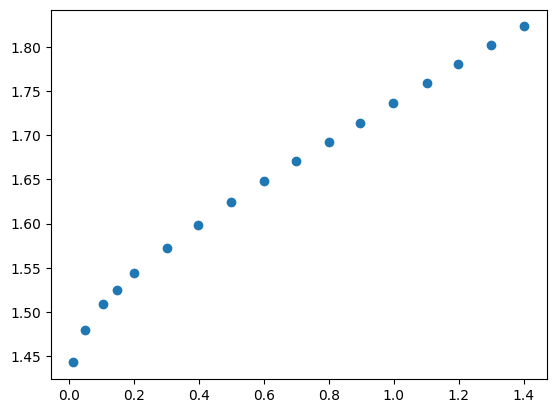

In [35]:
iKennlinieDataAmpere = np.array([12, 47, 103, 147, 200, 300, 397, 498, 600, 700, 799, 896, 998, 1103, 1198, 1299, 1401], dtype=float) / 1000.0
uKennlinieDataVolt = np.array([1443, 1480, 1509, 1525, 1544, 1572, 1598, 1624, 1648, 1671, 1692, 1714, 1737, 1759, 1780, 1802, 1823], dtype=float) / 1000.0

plt.scatter(iKennlinieDataAmpere, uKennlinieDataVolt)

ValueError: 'x' and 'y' must have the same size

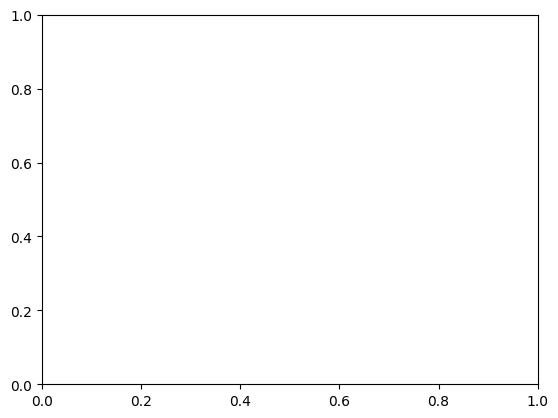

In [36]:
rDataParallel = np.array([
    [np.infty, 100, 50, 20, 10, 5, 3, 2, 1, 0.5, 0.3]])

uDataParallelVolt = np.array([
    [921, 911, 902, 886, 869, 844, 827, 810, 769, 730, 711], 
    [925, 914, 905, 888, 869, 841, 824, 808, 763, 722, 702], 
    [921, 911, 901, 884, 865, 837, 819, 799, 757, 713, 688]], dtype=float) / 1000.0

iDataParallelAmpere = np.array([
    [0, 9, 19, 43, 82, 160, 225, 307, 537, 798, 922],
    [0, 9, 19, 43, 83, 160, 225, 297, 538, 803, 926],
    [0, 9, 19, 43, 82, 162, 224, 305, 524, 788, 907]
], dtype=float) / 1000.0

uDataReiheVolt = np.array([
    [1857, 1798, 1758, 1693, 1619, 1501, 1420, 1319, 1051, 707, 628],
    [1868, 1810, 1770, 1707, 1635, 1516, 1438, 1334, 1082, 781, 643],
    [1868, 1809, 1773, 1708, 1636, 1518, 1437, 1337, 1075, 785, 660]
], dtype=float) / 1000.0

iDataReiheAmpere = np.array([
    [0, 18, 37, 84, 158, 310, 427, 580, 979, 1397, 1584],
    [0, 18, 38, 85, 160, 313, 431, 586, 985, 1427, 1602],
    [0, 18, 37, 85, 160, 313, 432, 585, 999, 1428, 1595]
], dtype=float) / 1000.0

uDataParallelVoltMean = np.mean(uDataParallelVolt, axis=0)
uErrorParallel = np.std(uDataParallelVolt, axis=0)
iDataParallelAmpereMean = np.mean(iDataParallelAmpere, axis=0)
iErrorParallel = np.std(iDataParallelAmpere, axis=0)

uDataReiheVoltMean = np.mean(uDataReiheVolt, axis=0)
uErrorReihe = np.std(uDataReiheVolt, axis=0)
iDataReiheAmpereMean = np.mean(iDataReiheAmpere, axis=0)
iErrorReihe = np.std(iDataReiheAmpere, axis=0)
#plt.errorbar(iDataParallelAmpereMean, uDataParallelVoltMean ,label="parallel", xerr=iErrorParallel, yerr=uErrorParallel)
#plt.errorbar(iDataReiheAmpereMean, uDataReiheVoltMean ,label="reihe", xerr=iErrorReihe, yerr=uErrorReihe)
plt.errorbar(rDataParallel, iDataParallelAmpereMean, yerr=iErrorParallel, lable="I parallel")
plt.errorbar(rDataParallel, iDataReiheAmpereMean, yerr=iErrorReihe, label="I reihe")
plt.legend()